# 💵 **Default de préstamos** 💵

## Introducción

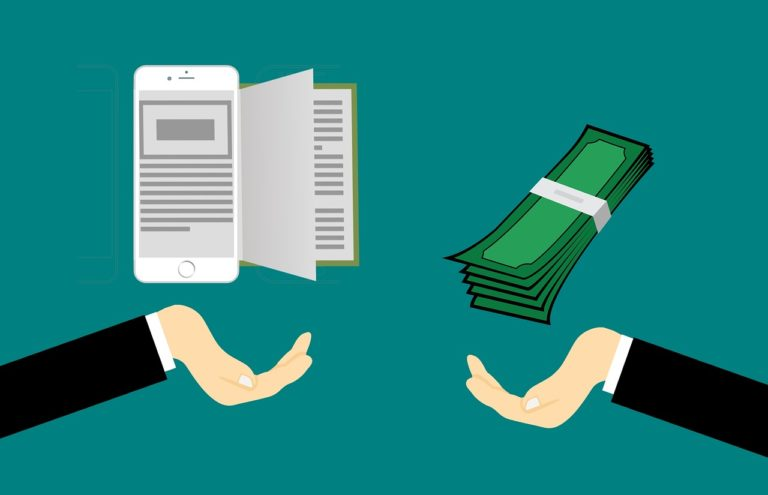


Los bancos obtienen grandes ganancias brindando préstamos, aunque esto siempre está asociado a un riesgo, ya que el tomador puede defaultear su préstamo.
Para mitigar este problema, con los datos sobre los tomadores de préstamo en el pasado y empleando mecanismos de Machine Learning se puede determinar la posibilidad de que se defaultee o no un préstamo.

La idea es determinar el tipo de perfil de cliente que tiene más probabilidades de no pagar el préstamo.

Fuente del dataset:  https://www.kaggle.com/datasets/yasserh/loan-default-dataset

El data set contiene

*   ID
*   year (año, 2019)
*   Loan limit (con o sin)
*   Gender (género)
*   Approved in advance (Pre aprobado: pre, nopre)
*   Loan Type  (type1, type2)
*   Loan Purpose (p1,p2,p3,p4)
*   Credit worthiness ("merecedor del crédito")
*   Open credit (El capital disponible bajo Open Credit se desembolsará en la cuenta que el Cliente desee: si, no)
*   Bussiness or commercial (bc, nbc)
*   Rate of interest
*   Interest rate spread
*   Upfront charges (otros cargos)
*   Term (plazo del préstamo, se asume en semanas)
*   Negotiative ammortization (si, no) significa que, incluso cuando usted paga regularmente, la cantidad que usted debe sigue subiendo porque no está pagando lo suficiente para cubrir los intereses.
*   Interest only (si, no)
*   Lump sum payment (Un "balloon payment" o pago global es un pago único, más grande de lo normal, que se hace al final del plazo del préstamo: si, no)
*   Property value (valor de la propiedad puesta en garantía)
*   Construction type (sb, mh)
*   Occupancy type (pr, ir)
*   Secured by (home, land)
*   Total units (se asume las unidades puestas en garantía 1u, 2u,etc)
*   Income (ingresos)
*   Credit type (tipo de crédito)
*   Credit Score 
*   Co-applicant credit type
*   Age (edad, rango etario)
*   Submission of application
*   LTV value (ratio préstamo-valor, ratio máximo del préstamo al valor o porcentaje de financiación​ expresa la cantidad de un primer derecho de retención de hipoteca como porcentaje del total del valor de tasación de los bienes inmuebles.)
*   Region (norte, sur, etc)
*   Security type
*   Status(1= defaulted 0= not defaulted)
*   Dtir 1


























Integrantes del equipo 🦸:


*   Ariana Diaz
*   Federico Martucci



In [ ]:
!pip install mlxtend 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Python'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Python


In [ ]:
df=pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


En primer lugar, y dado que el dataset contiene 34 variables, se van a definir las más significativas para poder analizarlas.

In [ ]:
df.shape

(148670, 34)

In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

## Data Wrangling 📋

### Análisis valores faltantes

In [ ]:
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

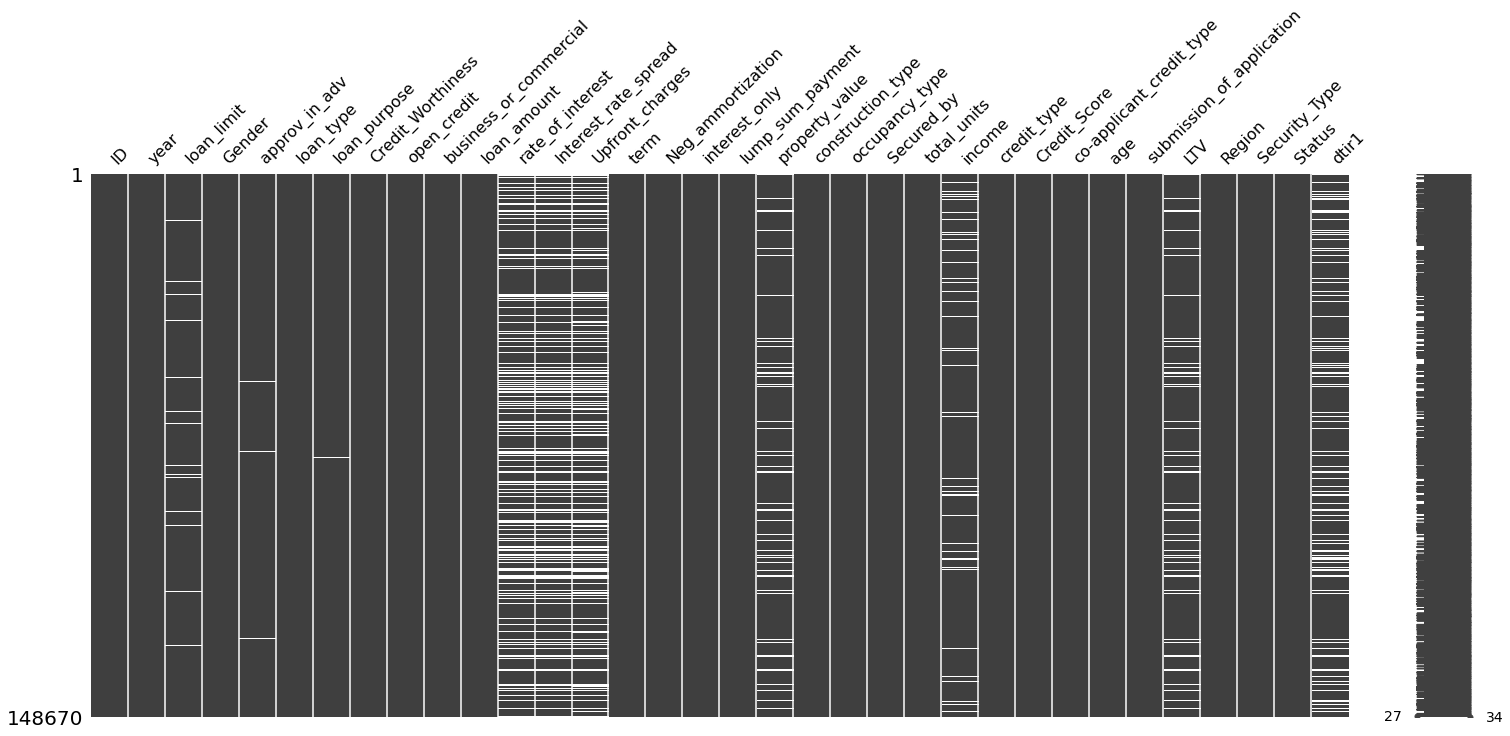

<Figure size 1080x648 with 0 Axes>

In [ ]:
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

La mayoría de los prestamos en default (Status=1) cuentan con datos faltantes en sus variables.

In [ ]:
#Primero se va a crear una uneva categoría en las variables categóricas para los nan: "ns/nc"
df_clean=df.copy()
varscat=['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit',
'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 
'occupancy_type', 'Secured_by','total_units','credit_type' ,'co-applicant_credit_type', 'age', 'submission_of_application', 
'Region', 'Security_Type']
varsnoncat=['year', 'loan_amount', 'rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value', 'income','Credit_Score','LTV', 'Status','dtir1']

for i,var in enumerate(varscat):
  df_clean[var] = np.where(df_clean[var].isnull(),"ns/nc",df_clean[var])
 

In [ ]:
#Para las variables que no son categóricas se completarán con la media
df_clean.fillna(df_clean.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


### Outliers

Se eliminarán los ultiers por fuera del primer y cuarto cuartil.

In [ ]:
def subset_by_iqr(df, column, whisker_width=1.5):
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     

# Example for whiskers = 1.5, as requested by the OP

for i in varsnoncat:
  df_clean2 = subset_by_iqr(df_clean, i, whisker_width=1.5)
print(df_clean.shape)
print(df_clean2.shape)
df_eda=df_clean2.copy()

(148670, 34)
(143162, 34)


### Feature Scaling

In [ ]:
#Uso Label Encoder para variables categóricas
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
df_clean2 = MultiColumnLabelEncoder(columns = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit',
'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 
'occupancy_type', 'Secured_by','total_units','credit_type' ,'co-applicant_credit_type', 'age', 'submission_of_application', 
'Region', 'Security_Type']).fit_transform(df_clean)

In [ ]:
#Estandarizo los datos
from sklearn.preprocessing import PowerTransformer
X = df_clean2.drop("Status", 1).values
y = df_clean2['Status']
Yeo=PowerTransformer(method='yeo-johnson').fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [ ]:
df_norm=pd.DataFrame(Yeo)
df_norm=df_norm.join(y)
df_norm = df_norm.rename(columns={0:'ID', 1:'year', 2: 'loan_limit', 3:'Gender', 4:'approv_in_adv', 5:'loan_type',
       6: 'loan_purpose', 7: 'Credit_Worthiness', 8: 'open_credit',
       9: 'business_or_commercial', 10: 'loan_amount', 11: 'rate_of_interest',
       12:'Interest_rate_spread', 13:'Upfront_charges', 14:'term', 15:'Neg_ammortization',
       16: 'interest_only', 17:'lump_sum_payment', 18:'property_value',
       19:'construction_type', 20:'occupancy_type', 21:'Secured_by', 22:'total_units',
       23:'income', 24:'credit_type', 25:'Credit_Score', 26:'co-applicant_credit_type',
       27:'age', 28: 'submission_of_application', 29:'LTV', 30:'Region', 31:'Security_Type', 32:'dtir1', 33:'Status'})
df_norm

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1,Status
0,-1.893314,0.0,-0.313732,1.295683,-0.439288,-0.55989,-1.527979,-0.210812,-0.061269,0.402889,...,1.261693,0.517924,-0.999233,-1.732247,0.742359,1.222755,1.060971,0.0149,0.754201,1
1,-1.893282,0.0,-0.313732,0.391658,-0.439288,1.74424,-1.527979,-0.210812,-0.061269,-2.482071,...,0.697189,-1.288973,1.000767,0.581106,0.742359,0.081335,-0.987098,0.0149,-0.076648,1
2,-1.893249,0.0,-0.313732,0.391658,2.278254,-0.55989,-1.527979,-0.210812,-0.061269,0.402889,...,1.261693,1.149676,-0.999233,-0.767186,0.742359,0.421281,1.060971,0.0149,0.874727,0
3,-1.893217,0.0,-0.313732,0.391658,-0.439288,-0.55989,1.085322,-0.210812,-0.061269,0.402889,...,1.261693,-0.970643,-0.999233,-0.033611,-1.348980,-0.082640,-0.987098,0.0149,0.401488,0
4,-1.893184,0.0,-0.313732,-0.551900,2.278254,-0.55989,-1.527979,-0.210812,-0.061269,0.402889,...,-0.058752,-0.835789,1.000767,-1.732247,-1.348980,0.940470,-0.987098,0.0149,0.062383,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,1.625326,0.0,-0.313732,1.295683,-0.439288,-0.55989,-0.061172,-0.210812,-0.061269,0.402889,...,-1.250586,-0.331327,1.000767,0.581106,0.742359,0.035366,1.060971,0.0149,1.120128,0
148666,1.625345,0.0,-0.313732,0.391658,-0.439288,-0.55989,-1.527979,-0.210812,-0.061269,0.402889,...,-1.250586,-1.133699,-0.999233,-1.732247,-1.348980,0.161613,1.060971,0.0149,-2.094027,0
148667,1.625365,0.0,-0.313732,0.391658,-0.439288,-0.55989,1.085322,-0.210812,-0.061269,0.402889,...,-1.250586,0.041480,1.000767,-0.033611,-1.348980,-0.493146,-0.987098,0.0149,1.244977,0
148668,1.625385,0.0,-0.313732,-1.559861,-0.439288,-0.55989,1.085322,-0.210812,-0.061269,0.402889,...,1.261693,0.340405,1.000767,0.581106,0.742359,-0.018538,-0.987098,0.0149,-0.963678,0


### Seleccion de variables

In [ ]:
X = df_norm.drop(columns=['Status', 'Interest_rate_spread','Upfront_charges'])
y = df_norm['Status']    

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import array 
selector = SelectKBest(f_classif, k=4)
selector.fit(X, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]
features_df_new

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,lump_sum_payment,income,credit_type,co-applicant_credit_type
0,0.152617,-1.482989,1.261693,-0.999233
1,-6.552344,-0.267520,0.697189,1.000767
2,0.152617,0.723656,1.261693,-0.999233
3,0.152617,1.126123,1.261693,-0.999233
4,0.152617,0.891890,-0.058752,1.000767
...,...,...,...,...
148665,0.152617,0.412272,-1.250586,1.000767
148666,0.152617,0.260209,-1.250586,-0.999233
148667,0.152617,0.207286,-1.250586,1.000767
148668,0.152617,0.260209,1.261693,1.000767


## EDA - Exploratory Data Analysis 📊




In [ ]:
df.shape

(148670, 34)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,1.735590e+05
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2.019000e+03
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3.576500e+06
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.000000e+00
Interest_rate_spread,112031.0,0.441656,0.513043,-3.638000,0.07600,0.39040,0.775400,3.357000e+00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,6.000000e+04
term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,3.600000e+02
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,1.650800e+07
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,5.785800e+05
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,9.000000e+02


Se realizará un análisis de las variables que se consideran como las más destacadas para determinar si se pagará o no el préstamo, y otras que a criterio personal son importantes a la hora de otorgar uno:

*   Status
*   Upfront_charges (Otros cargos)
*   Lump_sum_payment (Ballon payment)
*   credit_type (Tipo de crédito)
*   co-applicant_credit_type(tipo de crédito del co aplicante)
*   income (ingresos)
*   rate_of_interest (Tasa de Interes)
*   property_value (Valor de la propiedad)
*   loan_amount (Monto del crédito)
*   age (Edad)

Se utilizará el dataset sin los outliers y sin valores faltantes 










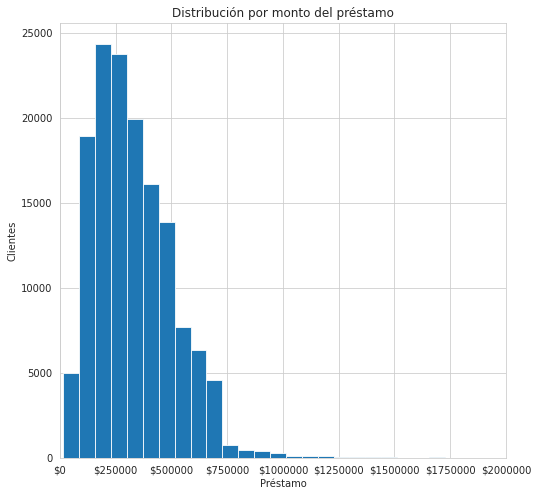

In [ ]:
#Histograma por monto del préstamo
#mpl.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.color_palette("bright")
fig,ax = plt.subplots(figsize =(8, 8))
sns.histplot(data=df_eda, x="loan_amount", bins=50, alpha=1)
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('$%d'))
ax.set(xlabel='Préstamo', ylabel='Clientes')
ax.set_title('Distribución por monto del préstamo')
plt.xlim(0,2000000)
plt.show()

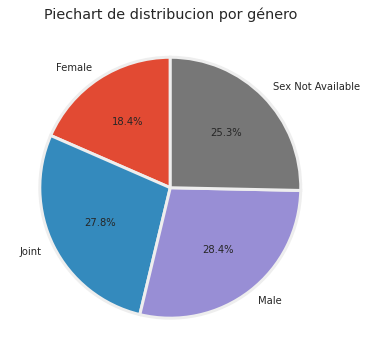

In [ ]:
df_genero=df_eda[['ID','Gender']].groupby(by='Gender').count()
#Grafico de torta del genero de los tomadores de préstamos
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize =(10,6))
ax.pie(df_genero.ID,labels=df_genero.index,autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax.set_title('Piechart de distribucion por género')
plt.show()

Si bien la mayor proporcion de personas que toman un prestamo son hombres (y muy cerca aquellos que son mas de una persona, por ejemplo una pareja), dado que en un 25% de los prestamistas no hay datos sobre su género, es probable que este dato no sea correcto. A priori, menor cantidad de mujeres piden prestamos que hombres.

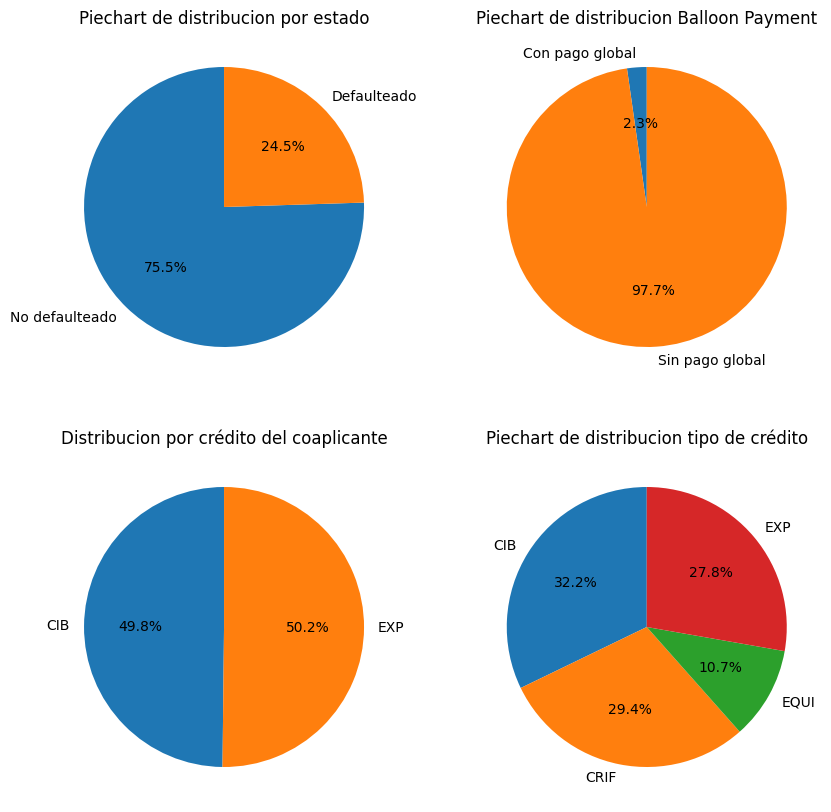

In [ ]:
df_lump=df_eda[['ID','lump_sum_payment']].groupby(by='lump_sum_payment').count()
df_status=df_eda[['ID','Status']].groupby(by='Status').count()
df_co_app=df_eda[['ID','co-applicant_credit_type']].groupby(by='co-applicant_credit_type').count()
df_tipo=df_eda[['ID','credit_type']].groupby(by='credit_type').count()

plt.style.use('default')
fig, ax = plt.subplots(2, 2, figsize=(10,10))
labels2='Con pago global', 'Sin pago global'
labels3='No defaulteado', 'Defaulteado' 

ax[1,0].pie(df_co_app.ID,labels=df_co_app.index,autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax[1,0].set_title('Distribucion por crédito del coaplicante')

ax[0,1].pie(df_lump.ID,labels=labels2, autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax[0,1].set_title('Piechart de distribucion Balloon Payment')

ax[0,0].pie(df_status.ID,labels=labels3,autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax[0,0].set_title('Piechart de distribucion por estado')

ax[1,1].pie(df_tipo.ID,labels=df_tipo.index,autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax[1,1].set_title('Piechart de distribucion tipo de crédito')
plt.show()

❗Dataset desbalanceado, solo apróximadamente un 25% de los clientes no pagarán el crédito

In [ ]:
df_co_app

,ID
co-applicant_credit_type,
CIB,71331
EXP,71831


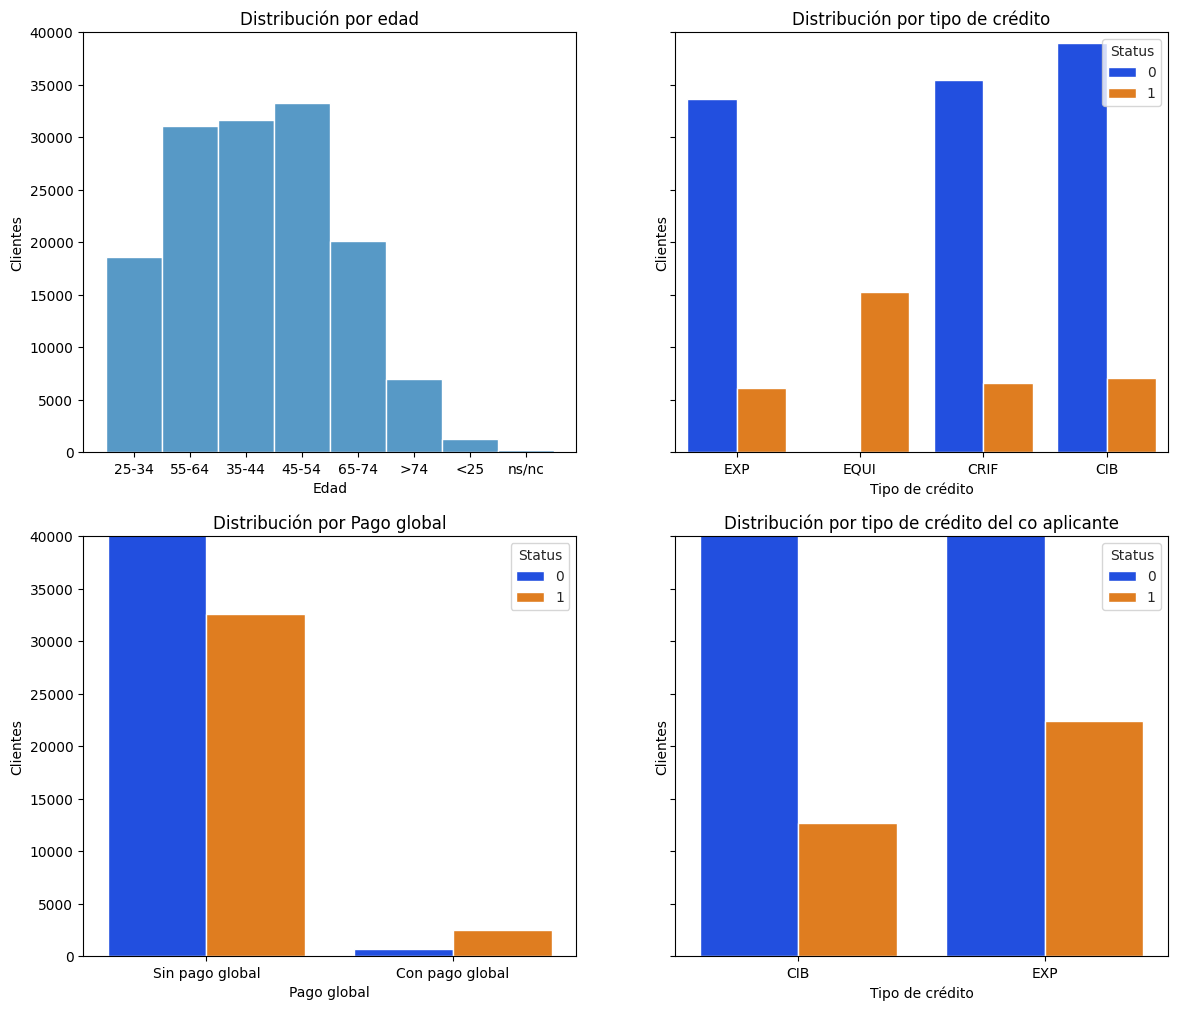

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(14, 12), sharey=True)
sns.set_style("whitegrid")
labels2='Sin pago global', 'Con pago global'

sns.histplot(ax=ax[0,0],data=df_eda, x="age", palette='bright')
ax[0,0].set(xlabel='Edad', ylabel='Clientes')
ax[0,0,].set_title('Distribución por edad')

sns.countplot(ax=ax[0,1], data=df_eda, x="credit_type", hue='Status', palette='bright')
ax[0,1].set(xlabel='Tipo de crédito', ylabel='Clientes')
ax[0,1].set_title('Distribución por tipo de crédito')
plt.ylim(0, 40000)

sns.countplot(ax=ax[1,0], data=df_eda, x="lump_sum_payment", hue='Status', palette='bright')
ax[1,0].set(xlabel='Pago global', ylabel='Clientes')
ax[1,0].set_title('Distribución por Pago global')
ax[1,0].set_xticklabels(labels2)

sns.countplot(ax=ax[1,1], data=df_eda, x="co-applicant_credit_type", hue='Status', palette='bright')
ax[1,1].set(xlabel='Tipo de crédito', ylabel='Clientes')
ax[1,1].set_title('Distribución por tipo de crédito del co aplicante')
plt.ylim(0, 40000)
plt.show()

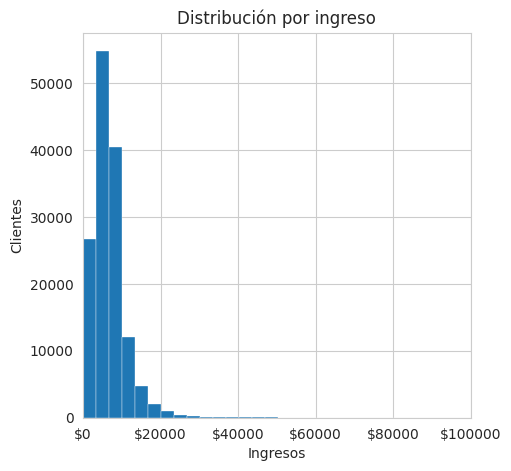

In [ ]:
#Histograma por ingresos
sns.set_style("whitegrid")
sns.color_palette("bright")
fig,ax = plt.subplots(figsize =(5, 5))
sns.histplot(data=df_eda, x="income", bins=100, alpha=1, palette='bright')
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('$%d'))
ax.set(xlabel='Ingresos', ylabel='Clientes')
ax.set_title('Distribución por ingreso')
plt.xlim(0,100000)
plt.show()

Como vimos en clase, son pocos los que ganan mucho y muchos los que ganan poco. Asimetría a derecha

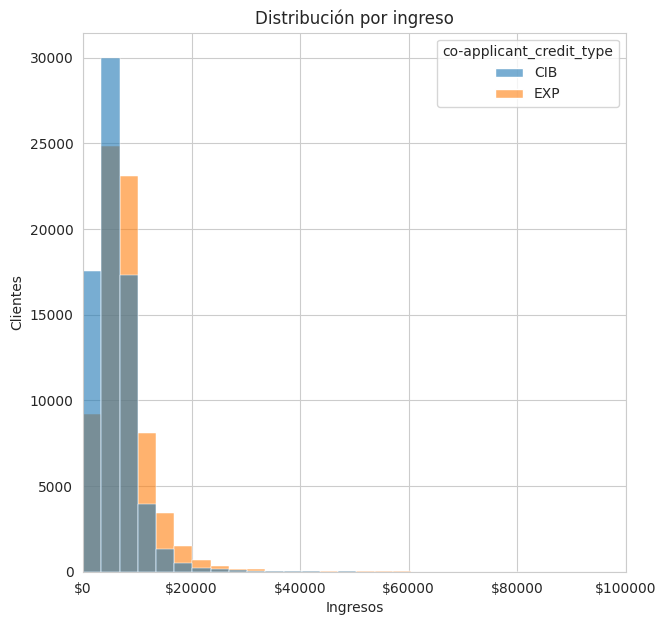

In [ ]:
#Histograma por ingresos
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize =(7, 7))
sns.histplot(data=df_eda, x="income", bins=100, hue='co-applicant_credit_type', alpha=0.6)
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('$%d'))
ax.set(xlabel='Ingresos', ylabel='Clientes')
ax.set_title('Distribución por ingreso')
plt.xlim(0,100000)
plt.show()

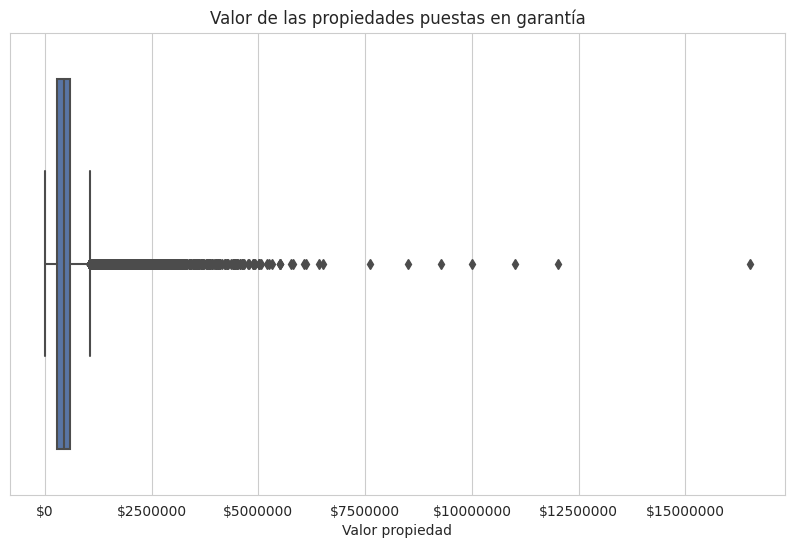

In [ ]:
#Valores de las propiedades como garantía
fig,ax = plt.subplots(figsize =(10, 6))
sns.set_theme(style="whitegrid")
sns.color_palette("Paired")
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('$%d'))
sns.boxplot(data=df_eda, x='property_value')
ax.set(xlabel='Valor propiedad')
ax.set_title('Valor de las propiedades puestas en garantía')
plt.show()

Mucha variabilidad y outliers en los precios de las propiedades.

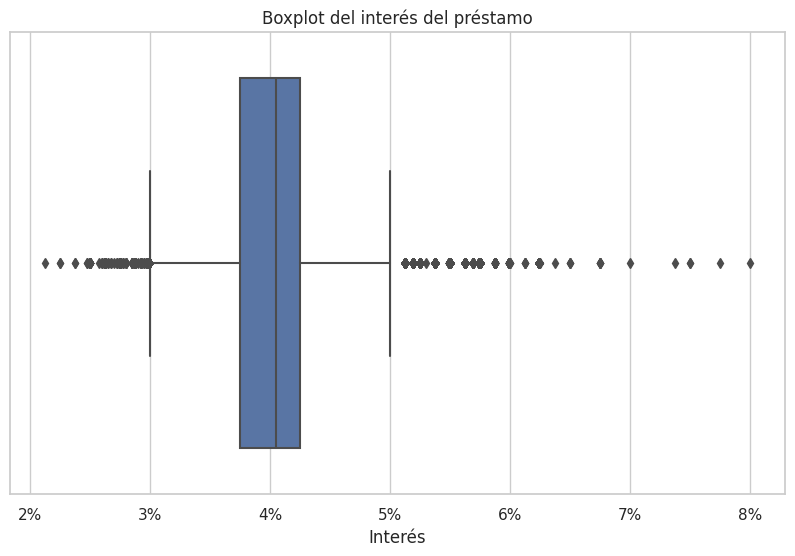

In [ ]:
#Interés del préstamo
sns.color_palette("Paired")
fig,ax = plt.subplots(figsize =(10, 6))
sns.boxplot(data=df_eda, x='rate_of_interest')
ax.set(xlabel='Interés')
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%d%%'))
ax.set_title('Boxplot del interés del préstamo')
plt.show()

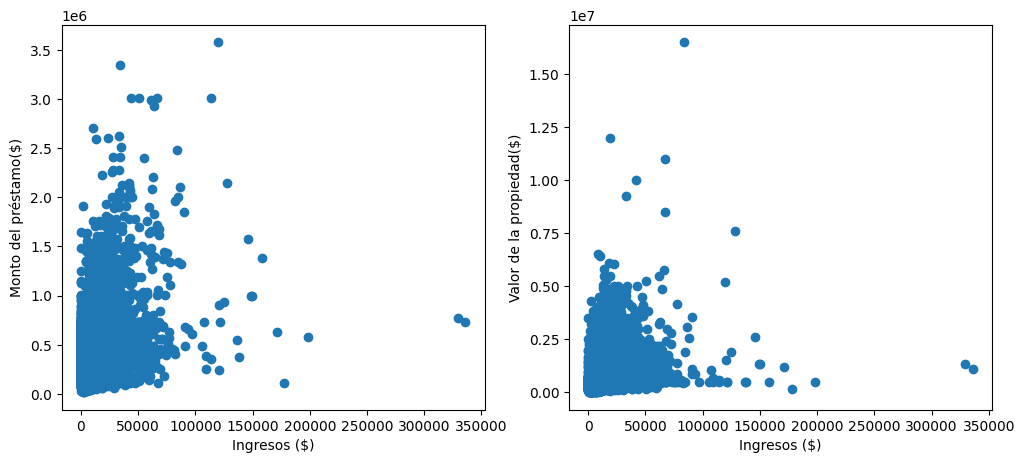

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
plt.style.use('default')
ax1.scatter(data=df_eda, x='income', y='loan_amount')
plt.xlabel("Ingresos ($)")
ax1.set_ylabel("Monto del préstamo($)")


ax2.scatter(data=df_eda, x='income', y='property_value')
ax1.set_xlabel("Ingresos ($)")
ax2.set_ylabel("Valor de la propiedad($)")
plt.show()

Text(24.499999999999993, 0.5, 'Monto del préstamo($)')

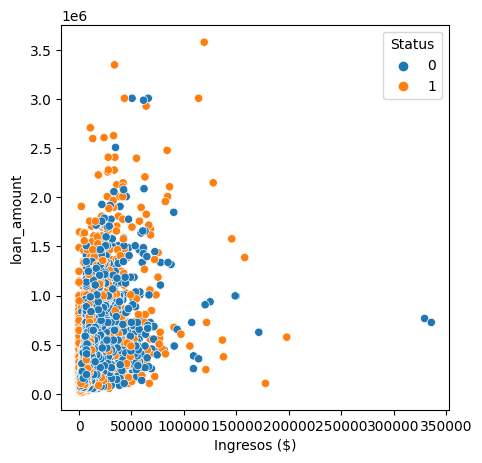

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
plt.style.use('default')
sns.scatterplot(data=df_eda, x='income', y='loan_amount', hue='Status')
plt.xlabel("Ingresos ($)")
ax.set_ylabel("Monto del préstamo($)")


Se puede ver como las personas con menos ingresos son quienes toman préstamos con montos más altos.

Tiene sentido que a menor ingreso, menor sea el valor de la propiedad.

<function matplotlib.pyplot.show>

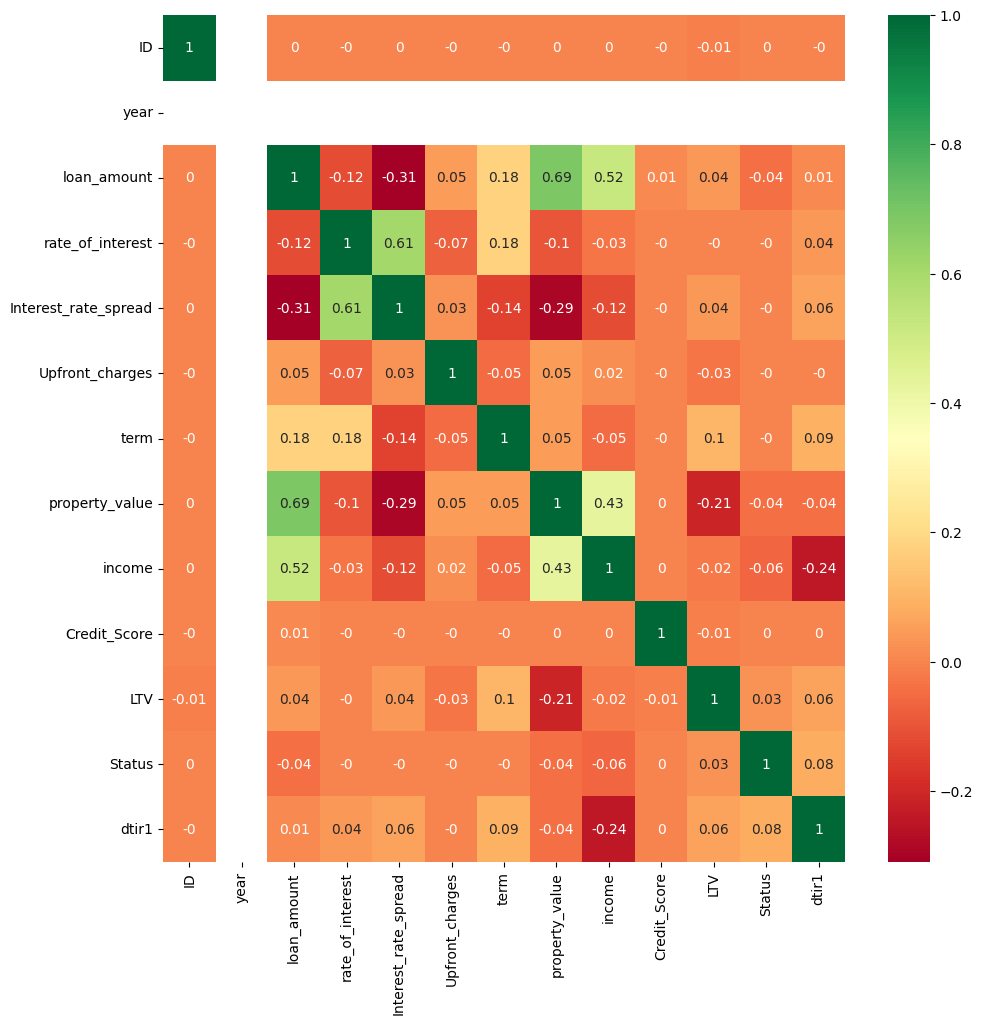

In [ ]:
#Correlation analysis
plt.figure(figsize = (11,11))
sns.heatmap(df_eda.corr().round(2), annot=True, cmap="RdYlGn")
plt.show

El monto del préstamos se encuentra mayormente relacionado con el valor de la propiedad y el ingreso de el/los cliente(s).
El interés esta bastante relacionado con  el plazo del préstamo.

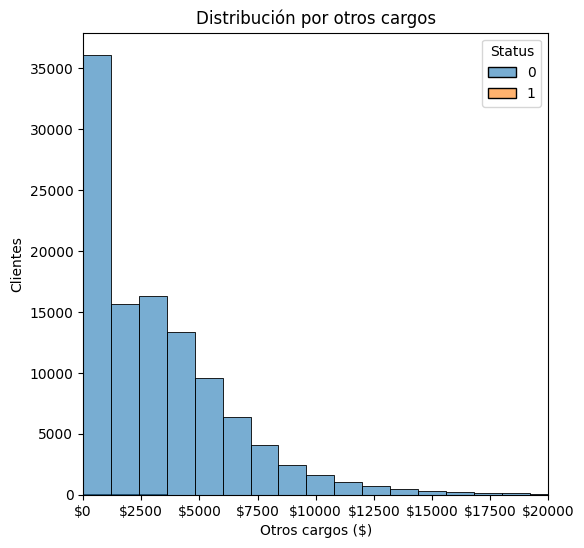

In [ ]:
#Histograma por Otros cargos
fig,ax = plt.subplots(figsize =(6, 6))
sns.histplot(data=df, x="Upfront_charges", bins=50, alpha=0.6, hue='Status')
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('$%d'))
ax.set(xlabel='Otros cargos ($)', ylabel='Clientes')
ax.set_title('Distribución por otros cargos')
plt.xlim(0,20000)
plt.show()

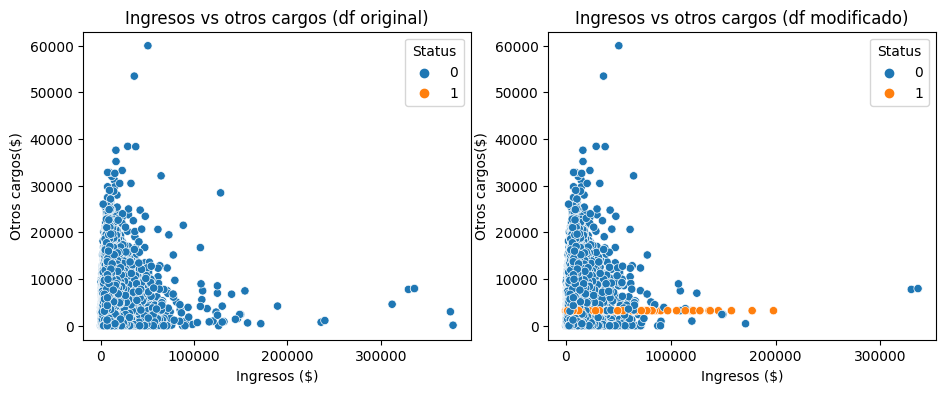

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.set_xticks(np.arange(0, 350000, 100000))
sns.scatterplot(ax=ax1,data=df, x='income', y='Upfront_charges', hue='Status')
ax1.set(xlabel='Ingresos ($)', ylabel='Otros cargos($)')
ax1.set_title('Ingresos vs otros cargos (df original)')

sns.scatterplot(ax=ax2, data=df_eda, x='income', y='Upfront_charges', hue='Status')
ax2.set(xlabel='Ingresos ($)', ylabel='Otros cargos($)')
ax2.set_title('Ingresos vs otros cargos (df modificado)')
ax2.set_xticks(np.arange(0, 350000, 100000))
plt.show()

Otros cargos no puede ser considerado, dado que cuando target es positiva, los datos de esta variable son null.
Únicamente cuando se completan los nulls del dataset con la media, comienza a aparecer la variable target como positiva. Para no generar ruido se decide no considerarla.


Text(0.5, 1.0, 'Ingresos vs Tipo de credito')

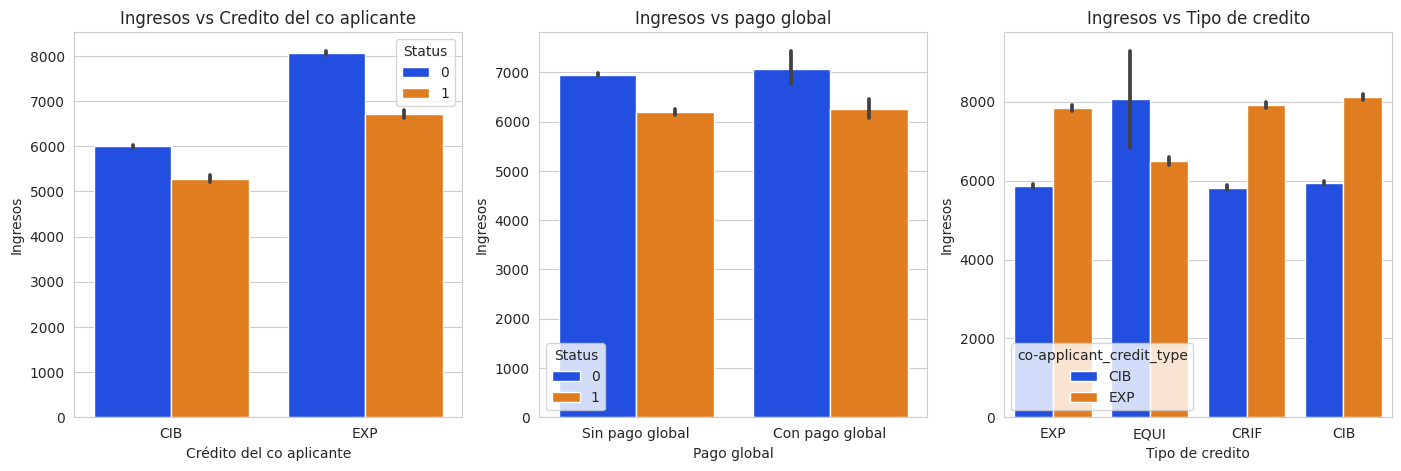

In [ ]:
fig,ax = plt.subplots(1,3,figsize =(17,5))

sns.barplot(ax=ax[0],x="co-applicant_credit_type", y="income", hue='Status',data=df_eda, palette='bright')
ax[0].set(xlabel='Crédito del co aplicante', ylabel='Ingresos')
ax[0].set_title('Ingresos vs Credito del co aplicante')


sns.barplot(ax=ax[1],x="lump_sum_payment", y="income", data=df_eda, palette='bright', hue='Status')
ax[1].set(xlabel='Pago global', ylabel='Ingresos')
ax[1].set_title('Ingresos vs pago global')
ax[1].set_xticklabels(labels2)

sns.barplot(ax=ax[2],x="credit_type", y="income", data=df_eda, palette='bright', hue='co-applicant_credit_type')
ax[2].set(xlabel='Tipo de credito', ylabel='Ingresos')
ax[2].set_title('Ingresos vs Tipo de credito')



Conclusiones principales:


*  Las personas con menos ingresos son quienes toman préstamos con montos más altos.
*   La mayor cantidad de gente que pide prestamos se encuentra entre 35 y 64 años.
*   A menor ingreso, menor sea el valor de la propiedad.
*   La correlación de la variable target con las variables no categóricas es baja.
*   Apróximadamente un 25% de los préstamos no fue abonado por el cliente.
*   La gran mayoría de los créditos de tipo EQUI no se pagarán.
*   La mayoría de los créditos con Ballon Payment no se pagarán, aunque son pocos casos.
*   Upfront_charges encuentra como Nan cuando Status es 1.
*   La gente con mayores ingresos toma crédito con un co aplicante de tipo CIB y los que tienen menores ingresos tipo EXP. Los tipo EXP tienen mas chances de no pagar.



















## Modelos de clasificación

Para los modelos de clasificación se utilizaran las 4 variables mas importantes seleccionadas en "Seleccion de variables"

### Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_df_new,y, test_size=0.3, random_state=42)
rl=LogisticRegression(max_iter=10000, n_jobs=-1, class_weight='balanced')
rl.fit(x_train, y_train)
y_test_pred_rl=rl.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_rl))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74     33687
           1       0.37      0.62      0.46     10914

    accuracy                           0.65     44601
   macro avg       0.61      0.64      0.60     44601
weighted avg       0.73      0.65      0.67     44601



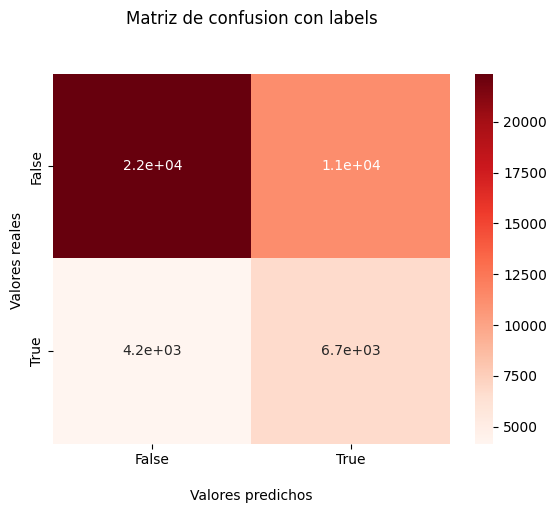

In [ ]:
from sklearn.metrics import confusion_matrix
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, y_test_pred_rl)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

No es un buen modelo. Muchos falsos positivos y postivos negativos


### Arbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=42) #Creamos el modelo
#Entrenamos el modelo
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_train_pred = tree.predict(x_train) #Prediccion en Train
y_test_pred_ad = tree.predict(x_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_ad))

              precision    recall  f1-score   support

           0       0.85      1.00      0.91     33687
           1       0.97      0.44      0.61     10914

    accuracy                           0.86     44601
   macro avg       0.91      0.72      0.76     44601
weighted avg       0.88      0.86      0.84     44601



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


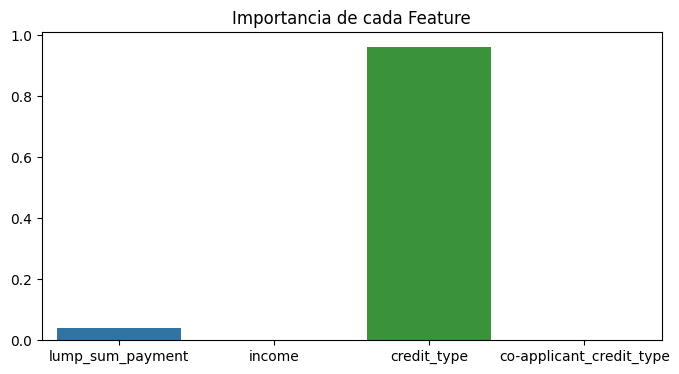

In [ ]:
plt.figure(figsize=(8,4))
importances = tree.feature_importances_
columns = x_test.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

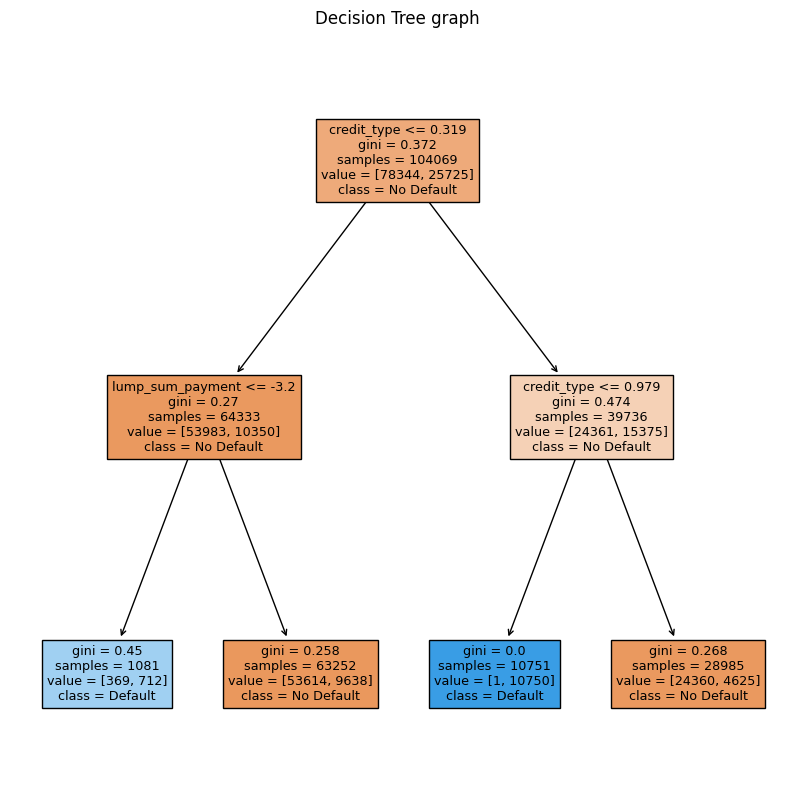

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(tree, feature_names=features_df_new.columns, class_names = ['No Default', 'Default'], filled=True)
plt.title('Decision Tree graph')
plt.show()

Parecería un buen modelo

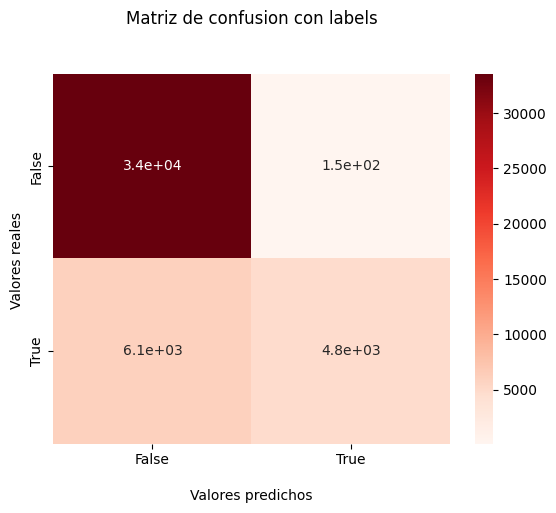

In [ ]:
from sklearn.metrics import confusion_matrix
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, y_test_pred_ad)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_test_pred_knn=knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     33687
           1       0.87      0.46      0.61     10914

    accuracy                           0.85     44601
   macro avg       0.86      0.72      0.76     44601
weighted avg       0.85      0.85      0.84     44601



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier(random_state=42, n_estimators=100, 
                               class_weight="balanced", max_features="log2") 
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)

In [ ]:
y_test_pred_rf = rf.predict(x_test)
y_train_pred_rf =rf.predict(x_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


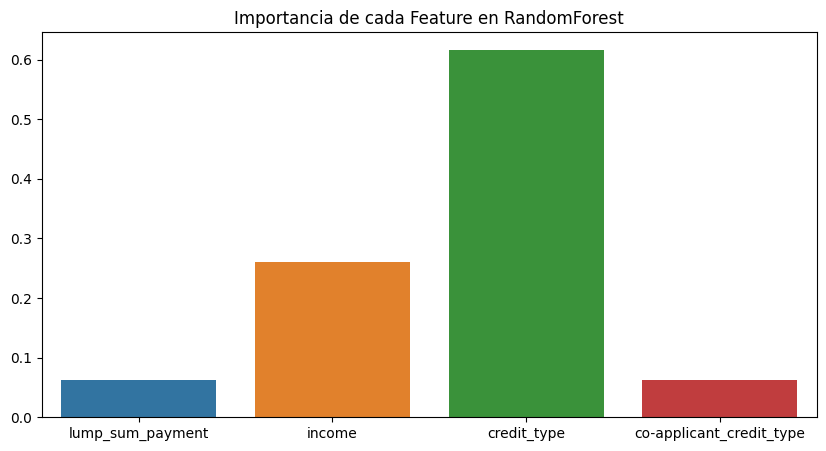

In [ ]:
plt.figure(figsize=(10,5))
importances = rf.feature_importances_
columns = x_test.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature en RandomForest')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     33687
           1       0.71      0.53      0.61     10914

    accuracy                           0.83     44601
   macro avg       0.78      0.73      0.75     44601
weighted avg       0.82      0.83      0.82     44601



### SCV

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
modelo = SVC(C=0.1,kernel='rbf',random_state=42)
modelo.fit(x_train, y_train)

SVC(C=0.1, random_state=42)

In [ ]:
y_test_pred_scv = modelo.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_scv))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     33687
           1       0.96      0.46      0.62     10914

    accuracy                           0.86     44601
   macro avg       0.91      0.73      0.77     44601
weighted avg       0.88      0.86      0.84     44601



In [ ]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_reg = regressor.predict(x_test)

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     33687
           1       0.71      0.53      0.61     10914

    accuracy                           0.83     44601
   macro avg       0.78      0.73      0.75     44601
weighted avg       0.82      0.83      0.82     44601



### Conclusiones

En este caso, como nos importa la cantidad de personas que no van a pagar el prestamo, la variable sensibilidad es mas importante.
Teniendo esto en cuenta, los modelos que mejor explicarían el caso son: Random Forest, arbol de decisión y KNN.
El Arbol de decisión solo tiene en cuenta una sola variable, por lo cual creo que los otros 2 modelos serían mas robustos.
Debido a que la mayoría de los modelos usan como más importante la variable Upfront_charges, y esta misma se encuentra como Nan cuando Status es 1, sería interesante probar los modelos sin esta variable.

## Mejora y revisión de modelos

### Stratified K fold

#### Random Forest

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
# crear el procedimiento Stratified K Fold 
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(features_df_new.values, y.values)

5

In [ ]:
train, test=list(skf.split(features_df_new.values, y.values))[0]

In [ ]:
# Modelo vacio
list_f1=[]
list_sensibilidad=[]
for i in range(0,skf.get_n_splits(features_df_new, y)):
  # Calculo de indices
  train, test = list(skf.split(features_df_new.values, y))[i]
  # Separar train y test
  X_train_n=features_df_new.values[train]
  X_test_n=features_df_new.values[test]
  y_test_n= y[test]
  y_train_n=y[train]
 
  # Ajustar el modelo
  rf.fit(X_train_n, y_train_n)
  # Predicciones
  pred= rf.predict(X_test_n)
  # Calculo del error
  f1= f1_score(y_true=y_test_n, y_pred= pred)
  sensibilidad= recall_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' f1:', f1)
  print('Iteracion: ',i+1, ' Sensibilidad:', sensibilidad)
  list_f1.append(f1)
  list_sensibilidad.append(sensibilidad)
# Promedio de accuracy
import numpy as np
print('F1 promedio:', np.mean(list_f1))
print('Sensibilidad promedio:', np.mean(list_sensibilidad))

Iteracion:  1  f1: 0.6056141439205955
Iteracion:  1  Sensibilidad: 0.5328875545851528
Iteracion:  2  f1: 0.6125581395348838
Iteracion:  2  Sensibilidad: 0.5391648471615721
Iteracion:  3  f1: 0.6076461885852215
Iteracion:  3  Sensibilidad: 0.5324781659388647
Iteracion:  4  f1: 0.6103936517815467
Iteracion:  4  Sensibilidad: 0.5353438864628821
Iteracion:  5  f1: 0.6226475279106859
Iteracion:  5  Sensibilidad: 0.5328238023747782
F1 promedio: 0.6117719303465867
Sensibilidad promedio: 0.53453965130465


Random Forest resulta un buen modelo


#### KNN

In [ ]:
list_f1=[]
list_sensibilidad=[]
for i in range(0,skf.get_n_splits(features_df_new, y)):
  # Calculo de indices
  train, test = list(skf.split(features_df_new.values, y))[i]
  # Separar train y test
  X_train_n=features_df_new.values[train]
  X_test_n=features_df_new.values[test]
  y_test_n= y[test]
  y_train_n=y[train]
 
  # Ajustar el modelo
  knn.fit(X_train_n, y_train_n)
  # Predicciones
  pred= knn.predict(X_test_n)
  # Calculo del error
  f1= f1_score(y_true=y_test_n, y_pred= pred)
  sensibilidad= recall_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' f1:', f1, 'Sensibilidad', sensibilidad)
  list_f1.append(f1)
  list_sensibilidad.append(sensibilidad)
# Promedio de accuracy
import numpy as np
print('F1 promedio:', np.mean(list_f1))
print('Sensibilidad promedio:', np.mean(list_sensibilidad))

Iteracion:  1  f1: 0.5908703798330779 Sensibilidad 0.4733897379912664
Iteracion:  2  f1: 0.6020240463627714 Sensibilidad 0.47489082969432317
Iteracion:  3  f1: 0.5868936170212766 Sensibilidad 0.4705240174672489
Iteracion:  4  f1: 0.603234501347709 Sensibilidad 0.4581058951965066
Iteracion:  5  f1: 0.6060127969147165 Sensibilidad 0.4718165688549202
F1 promedio: 0.5978070682959102
Sensibilidad promedio: 0.469745409840853


KNN resulta ser un buen modelo

###Arbol de decisión

In [ ]:
list_f1=[]
list_sensibilidad=[]
for i in range(0,skf.get_n_splits(features_df_new, y)):
  # Calculo de indices
  train, test = list(skf.split(features_df_new.values, y))[i]
  # Separar train y test
  X_train_n=features_df_new.values[train]
  X_test_n=features_df_new.values[test]
  y_test_n= y[test]
  y_train_n=y[train]
 
  # Ajustar el modelo
  tree.fit(X_train_n, y_train_n)
  # Predicciones
  pred= tree.predict(X_test_n)
  # Calculo del error
  f1= f1_score(y_true=y_test_n, y_pred= pred)
  sensibilidad= recall_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' f1:', f1, 'Sensibilidad', sensibilidad)
  list_f1.append(f1)
  list_sensibilidad.append(sensibilidad)
# Promedio de accuracy
import numpy as np
print('F1 promedio:', np.mean(list_f1))
print('Sensibilidad promedio:', np.mean(list_sensibilidad))

Iteracion:  1  f1: 0.6095896812786241 Sensibilidad 0.44500545851528384
Iteracion:  2  f1: 0.6164740961610138 Sensibilidad 0.45141921397379914
Iteracion:  3  f1: 0.6036568213783403 Sensibilidad 0.4392740174672489
Iteracion:  4  f1: 0.6064189189189189 Sensibilidad 0.4409115720524017
Iteracion:  5  f1: 0.6106484513895386 Sensibilidad 0.44533915654428824
F1 promedio: 0.6093575938252871
Sensibilidad promedio: 0.4443898837106044


### Hypertuning con RandomizedSearchCV

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

KNN

In [ ]:
params_grid = {
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [30, 60, 90],
        'p': [1, 2, 3],
        'n_neighbors' : [5,7,9,11,13,15],
         'weights' : ['uniform','distance'],
          'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
grid_cv = RandomizedSearchCV(knn, params_grid, scoring="f1", n_jobs=-1, cv=3)
grid_cv.fit(x_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Sensibilidad del modelo = {round(recall_score(y_test, grid_cv.predict(x_test)), 5)}')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Mejores parametros {'weights': 'uniform', 'p': 3, 'n_neighbors': 13, 'metric': 'minkowski', 'leaf_size': 30, 'algorithm': 'brute'}
Mejor score de CV 0.6280820227847416
Sensibilidad del modelo = 0.46976


In [ ]:
print(f'F1 del modelo = {round(f1_score(y_test, grid_cv.predict(x_test)), 5)}')

F1 del modelo = 0.62673


Random Forest

In [ ]:
params_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
grid_cv = RandomizedSearchCV(rf, params_grid, scoring="f1", n_jobs=-1, cv=3)
grid_cv.fit(x_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Sensibilidad del modelo = {round(recall_score(y_test, grid_cv.predict(x_test)), 5)}')
print(f'F1 del modelo = {round(f1_score(y_test, grid_cv.predict(x_test)), 5)}')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Mejores parametros {'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Mejor score de CV 0.6217468175781778
Sensibilidad del modelo = 0.53161
F1 del modelo = 0.62307


## Conclusiones

Se considera el mejor modelo Random Forest con los siguientes parametros:
'n_estimators': 1600, 
'min_samples_split': 10, 
'min_samples_leaf': 1, 'max_features': 
'sqrt', 'max_depth': 10, 
'bootstrap': False


In [ ]:
#Se prueba nuevamente el modelo
# Modelo vacio
list_f1=[]
list_sensibilidad=[]
list_acc=[]
list_prec=[]
rf=RandomForestClassifier(n_estimators= 1600, min_samples_split= 10, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 10, bootstrap= False)
for i in range(0,skf.get_n_splits(features_df_new, y)):
  # Calculo de indices
  train, test = list(skf.split(features_df_new.values, y))[i]
  # Separar train y test
  X_train_n=features_df_new.values[train]
  X_test_n=features_df_new.values[test]
  y_test_n= y[test]
  y_train_n=y[train]
 
  # Ajustar el modelo
  rf.fit(X_train_n, y_train_n)
  # Predicciones
  pred= rf.predict(X_test_n)
  # Calculo del error
  f1= f1_score(y_true=y_test_n, y_pred= pred)
  sensibilidad= recall_score(y_true=y_test_n, y_pred= pred)
  acc=accuracy_score(y_true=y_test_n, y_pred= pred)
  prec=precision_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' f1:', f1)
  print('Iteracion: ',i+1, ' Sensibilidad:', sensibilidad)
  list_f1.append(f1)
  list_sensibilidad.append(sensibilidad)
  list_acc.append(acc)
  list_prec.append(prec)
# Promedio de accuracy
import numpy as np
print('F1 promedio:', np.mean(list_f1))
print('Sensibilidad promedio:', np.mean(list_sensibilidad))
print('Accuracy promedio:', np.mean(list_acc))
print('Precision promedio:', np.mean(list_prec))

Iteracion:  1  f1: 0.6266532883334854
Iteracion:  1  Sensibilidad: 0.46875
Iteracion:  2  f1: 0.6333242233761501
Iteracion:  2  Sensibilidad: 0.47434497816593885
Iteracion:  3  f1: 0.6217825409911147
Iteracion:  3  Sensibilidad: 0.46315502183406115
Iteracion:  4  f1: 0.625103296299697
Iteracion:  4  Sensibilidad: 0.4645196506550218
Iteracion:  5  f1: 0.633151183970856
Iteracion:  5  Sensibilidad: 0.47440971748328103
F1 promedio: 0.6280029065942607
Sensibilidad promedio: 0.4690358736276606
Accuracy promedio: 0.8630658505414678
Precision promedio: 0.9500315585804225
